In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [2]:
medhist = pd.read_csv('../data/Medical_History/MEDHIST_11Sep2023.csv')
hosp = pd.read_csv('../data/Medical_History/RECADV_11Sep2023.csv')
physical = pd.read_csv('../data/Medical_History/PHYSICAL_11Sep2023.csv')
vitals = pd.read_csv('../data/Medical_History/VITALS_11Sep2023.csv')
meds = pd.read_csv('../data/Medical_History/RECCMEDS_11Sep2023.csv')
neuro = pd.read_csv('../data/Medical_History/NEUROEXM_11Sep2023.csv')
diag = pd.read_csv('../data/Medical_History/DXSUM_PDXCONV_ADNIALL_15Sep2023.csv')
demo = pd.read_csv('../data/Subject_Characteristics/PTDEMOG_11Sep2023.csv')
famhist = pd.read_csv('../data/Subject_Characteristics/FHQ_11Sep2023.csv')
merge = pd.read_csv('../data/ADNIMERGE.csv')
challenge = pd.read_csv('../data/AD_Challenge_Training_Data_Clinical_Updated_7.22.2014/ADNI_Training_Q3_APOE_CollectionADNI1Complete 1Yr 1.5T_July22.2014.csv')

/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_24393/630341187.py:2: DtypeWarning: Columns (11,34) have mixed types. Specify dtype option on import or set low_memory=False.
  hosp = pd.read_csv('../data/Medical_History/RECADV_11Sep2023.csv')
/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_24393/630341187.py:5: DtypeWarning: Columns (11,15,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  meds = pd.read_csv('../data/Medical_History/RECCMEDS_11Sep2023.csv')
/var/folders/yw/8xqyfbcx5814v3s56wgs8nxw0000gn/T/ipykernel_24393/630341187.py:10: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  merge = pd.read_csv('../data/ADNIMERGE.csv')


In [3]:
challenge.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/05,AD,9/12/05,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11/8/05,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/05,CN,9/7/05,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,11/29/05,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11/7/05,AD,11/10/05,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD


In [4]:
challenge['EXAMDATE'] = pd.to_datetime(challenge['EXAMDATE'])
challenge.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/05,AD,2005-09-12,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,2005-11-08,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/05,CN,2005-09-07,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,2005-11-29,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11/7/05,AD,2005-11-10,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD


In [5]:
challenge['Subject'].value_counts()

011_S_0003    1
082_S_0928    1
053_S_0919    1
033_S_0920    1
094_S_0921    1
             ..
131_S_0457    1
114_S_0458    1
137_S_0459    1
027_S_0461    1
127_S_1427    1
Name: Subject, Length: 628, dtype: int64

In [6]:
patient_ids = '010_S_0067, 007_S_0293, 009_S_0842, 009_S_1354, 002_S_0295, 002_S_0685, 007_S_1206, 006_S_1130, 005_S_0546, 002_S_0938, 007_S_0068, 007_S_0041, 009_S_1030, 005_S_0553, 005_S_0221, 005_S_0223, 010_S_0472, 005_S_0814, 005_S_0222, 005_S_0324, 007_S_0344, 002_S_1261, 002_S_0619, 002_S_0816, 007_S_1304, 007_S_1339, 006_S_0498, 009_S_1334, 006_S_0675, 002_S_0782, 005_S_0929, 007_S_1248, 010_S_0161, 002_S_1070, 002_S_0559, 007_S_0414, 002_S_0954, 002_S_1280, 005_S_1224, 006_S_0653, 010_S_0420, 002_S_0955, 006_S_0731, 002_S_1268, 010_S_0422, 006_S_0484, 002_S_0413, 005_S_0448, 009_S_0751, 010_S_0786, 005_S_1341, 010_S_0829, 010_S_0419, 006_S_0681, 006_S_0547, 005_S_0602, 009_S_0862, 010_S_0904, 002_S_1155, 007_S_0070, 007_S_0698, 007_S_0101, 002_S_1018, 005_S_0610, 007_S_0316, 005_S_0572, 007_S_1222, 007_S_0128, 002_S_0729, 007_S_0249, 009_S_1199, 013_S_1161, 011_S_0023, 013_S_0860, 011_S_0022, 014_S_0557, 013_S_0240, 011_S_0183, 011_S_0168, 011_S_0008, 011_S_0021, 012_S_1133, 012_S_1292, 013_S_1205, 014_S_0356, 012_S_1321, 013_S_0325, 014_S_0169, 016_S_1149, 016_S_1028, 011_S_0861, 016_S_0769, 012_S_0932, 013_S_1275, 014_S_0520, 012_S_1033, 013_S_0592, 016_S_1138, 011_S_0241, 013_S_1276, 012_S_0689, 016_S_1263, 012_S_0712, 011_S_0053, 012_S_1009, 016_S_0354, 016_S_1117, 016_S_0590, 014_S_0519, 011_S_0326, 016_S_0991, 012_S_0720, 016_S_0359, 012_S_1212, 013_S_1120, 016_S_1092, 013_S_0996, 016_S_1326, 012_S_1165, 011_S_0856, 013_S_0575, 014_S_0328, 012_S_1175, 014_S_0658, 016_S_1121, 012_S_0917, 014_S_0563, 011_S_0016, 013_S_0699, 016_S_0702, 013_S_1035, 011_S_1282, 012_S_0637, 011_S_1080, 014_S_0548, 011_S_0362, 012_S_0634, 013_S_0502, 012_S_0803, 011_S_0010, 014_S_0558, 013_S_1186, 016_S_0538, 014_S_1095, 021_S_0642, 021_S_0332, 023_S_0031, 022_S_0129, 022_S_1394, 018_S_0103, 023_S_0030, 022_S_0924, 021_S_0647, 020_S_0213, 021_S_0337, 022_S_1351, 023_S_0625, 022_S_0066, 021_S_0231, 018_S_0406, 022_S_0014, 023_S_0093, 022_S_1097, 023_S_0078, 021_S_0178, 023_S_0126, 020_S_0883, 023_S_0331, 023_S_0084, 021_S_0141, 023_S_0916, 021_S_0343, 022_S_0007, 021_S_0753, 021_S_0424, 023_S_0081, 021_S_0626, 023_S_0042, 023_S_0083, 022_S_0004, 023_S_0058, 022_S_0961, 018_S_0369, 022_S_0544, 021_S_0984, 023_S_0139, 023_S_0887, 018_S_0142, 021_S_0159, 023_S_0926, 018_S_0425, 018_S_0155, 018_S_0633, 022_S_0750, 020_S_0097, 022_S_0543, 022_S_0219, 021_S_1109, 023_S_0061, 020_S_0899, 023_S_0855, 020_S_1288, 021_S_0273, 018_S_0450, 018_S_0055, 018_S_0057, 018_S_0043, 018_S_0080, 018_S_0335, 022_S_0096, 023_S_0217, 023_S_0388, 023_S_0613, 018_S_0682, 022_S_0044, 022_S_1366, 023_S_0376, 022_S_0130, 018_S_0286, 021_S_0276, 023_S_0604, 018_S_0087, 032_S_0187, 029_S_1215, 027_S_1387, 027_S_1385, 029_S_0914, 032_S_0147, 027_S_0850, 027_S_0461, 027_S_0307, 031_S_0821, 023_S_1104, 023_S_1306, 029_S_1038, 023_S_1262, 023_S_1289, 031_S_0830, 027_S_0074, 032_S_1101, 024_S_1400, 029_S_0866, 027_S_0116, 023_S_0963, 024_S_1171, 024_S_1063, 027_S_1045, 027_S_0403, 027_S_0417, 031_S_1209, 029_S_1073, 027_S_1081, 029_S_0999, 032_S_0479, 027_S_1254, 024_S_1307, 032_S_0718, 032_S_0095, 027_S_1082, 027_S_0835, 027_S_0404, 027_S_0179, 027_S_0408, 031_S_0294, 029_S_0836, 023_S_1190, 032_S_0677, 031_S_0321, 029_S_1056, 029_S_1318, 031_S_0867, 032_S_1169, 029_S_0824, 032_S_1037, 027_S_1277, 024_S_0985, 032_S_0978, 031_S_0618, 032_S_0400, 023_S_1046, 029_S_0843, 023_S_1126, 027_S_1213, 027_S_0118, 023_S_1247, 029_S_0878, 027_S_0256, 024_S_1393, 029_S_1384, 027_S_0120, 029_S_0845, 032_S_0214, 031_S_0554, 031_S_0568, 029_S_1218, 031_S_1066, 027_S_0644, 029_S_1184, 031_S_0351, 027_S_0485, 037_S_0182, 037_S_0627, 033_S_0511, 033_S_0920, 033_S_0739, 033_S_0922, 033_S_0513, 037_S_0552, 033_S_0923, 036_S_1023, 033_S_0516, 037_S_0150, 036_S_0869, 036_S_0672, 036_S_0673, 033_S_0514, 035_S_0292, 036_S_0760, 036_S_0748, 036_S_0576, 033_S_1309, 033_S_0567, 033_S_1308, 033_S_1283, 036_S_0577, 033_S_1281, 035_S_0341, 035_S_0156, 036_S_0945, 033_S_1086, 037_S_0454, 033_S_1284, 033_S_1285, 036_S_1135, 035_S_0033, 037_S_0327, 035_S_0555, 036_S_0759, 036_S_1240, 033_S_1279, 037_S_0467, 035_S_0997, 033_S_1116, 036_S_0813, 037_S_0539, 037_S_0303, 037_S_1421, 037_S_0501, 035_S_0204, 033_S_1098, 033_S_0741, 037_S_1225, 036_S_0976, 033_S_0733, 036_S_0656, 037_S_0377, 033_S_1016, 033_S_0724, 037_S_0566, 033_S_0725, 033_S_0889, 035_S_0048, 033_S_0906, 037_S_0588, 033_S_0734, 036_S_1001, 033_S_0723, 037_S_1078, 062_S_0578, 062_S_0793, 057_S_1217, 053_S_0389, 057_S_1373, 053_S_1044, 057_S_0643, 062_S_0768, 062_S_1099, 062_S_1299, 057_S_1007, 041_S_1260, 057_S_1371, 041_S_0125, 062_S_0730, 041_S_1010, 057_S_0779, 062_S_0690, 041_S_0898, 053_S_0507, 041_S_0721, 041_S_0282, 041_S_0679, 052_S_0989, 041_S_1002, 057_S_1265, 041_S_0446, 062_S_0535, 041_S_1412, 053_S_0919, 057_S_0839, 041_S_1411, 041_S_1420, 041_S_1391, 052_S_0951, 041_S_1435, 057_S_0941, 057_S_0957, 041_S_1423, 052_S_1251, 052_S_0952, 057_S_1269, 062_S_1182, 052_S_1250, 041_S_1368, 041_S_0314, 041_S_1425, 057_S_0818, 041_S_1418, 052_S_1054, 041_S_0262, 062_S_1294, 057_S_0934, 052_S_1346, 052_S_1352, 057_S_0464, 041_S_0549, 057_S_0474, 052_S_1168, 057_S_1379, 053_S_0621, 041_S_0407, 052_S_0671, 041_S_0598, 082_S_0761, 082_S_0832, 067_S_0019, 082_S_1079, 067_S_0812, 082_S_1119, 073_S_0746, 068_S_0442, 068_S_0127, 068_S_0872, 072_S_1380, 082_S_1256, 082_S_0363, 067_S_0828, 068_S_0478, 072_S_0315, 068_S_0109, 073_S_0386, 073_S_0518, 073_S_0445, 082_S_0304, 067_S_0045, 067_S_0284, 067_S_0290, 067_S_0257, 067_S_0243, 068_S_1075, 067_S_0336, 067_S_0056, 068_S_0802, 098_S_0269, 067_S_1185, 098_S_0884, 073_S_1357, 073_S_0909, 067_S_0098, 082_S_0469, 068_S_0210, 067_S_0059, 082_S_0641, 073_S_0089, 068_S_0401, 067_S_0110, 082_S_0640, 073_S_0311, 098_S_0896, 098_S_0288, 098_S_0667, 067_S_0077, 073_S_0312, 082_S_0928, 082_S_1377, 067_S_0076, 098_S_0171, 067_S_1253, 072_S_1211, 067_S_0038, 098_S_0172, 073_S_0565, 068_S_0476, 068_S_1191, 067_S_0177, 068_S_0473, 067_S_0176, 098_S_0160, 067_S_0607, 098_S_0149, 067_S_0029, 099_S_0060, 099_S_0470, 099_S_1034, 100_S_0190, 109_S_1192, 100_S_1113, 100_S_0743, 116_S_0487, 099_S_0880, 114_S_1103, 116_S_0657, 114_S_1106, 109_S_1157, 100_S_0747, 100_S_0035, 114_S_0378, 109_S_1343, 099_S_0111, 109_S_1183, 100_S_1062, 099_S_1144, 116_S_0752, 116_S_1315, 116_S_1249, 116_S_0382, 109_S_0950, 109_S_0777, 100_S_0047, 100_S_0296, 116_S_0392, 099_S_0372, 116_S_1271, 100_S_0069, 116_S_0834, 116_S_1243, 109_S_0967, 100_S_0892, 100_S_1226, 116_S_1083, 100_S_0930, 114_S_0458, 099_S_0551, 116_S_0360, 116_S_0361, 109_S_1114, 099_S_0352, 116_S_0370, 099_S_0958, 100_S_1154, 114_S_0410, 099_S_0492, 100_S_1286, 099_S_0054, 100_S_0006, 099_S_0040, 114_S_0228, 099_S_0533, 109_S_1013, 114_S_0374, 099_S_0090, 114_S_0416, 109_S_0876, 100_S_0015, 114_S_0166, 116_S_1232, 114_S_0173, 114_S_0601, 099_S_0291, 109_S_1014, 099_S_0534, 116_S_0649, 114_S_1118, 114_S_0979, 116_S_0890, 116_S_0648, 099_S_0051, 100_S_0995, 128_S_0216, 128_S_1242, 123_S_1300, 128_S_0770, 128_S_0200, 128_S_0229, 128_S_0188, 128_S_0611, 128_S_1043, 128_S_0167, 128_S_0205, 126_S_1077, 128_S_0947, 126_S_0784, 123_S_0390, 126_S_0709, 123_S_0094, 126_S_0708, 126_S_0865, 126_S_0680, 128_S_1430, 123_S_0108, 128_S_0138, 123_S_0050, 128_S_1408, 128_S_0528, 128_S_0272, 128_S_0266, 128_S_0500, 128_S_1409, 128_S_0715, 128_S_0517, 128_S_0258, 123_S_0091, 128_S_0310, 128_S_1407, 123_S_0088, 126_S_0891, 128_S_1406, 128_S_0863, 128_S_1148, 128_S_0135, 126_S_1187, 123_S_0298, 123_S_0106, 123_S_0072, 128_S_0522, 126_S_1221, 128_S_0245, 126_S_0506, 123_S_0113, 126_S_1340, 128_S_0545, 128_S_1088, 123_S_0162, 128_S_0608, 128_S_0740, 128_S_0230, 126_S_0605, 128_S_0225, 128_S_0227, 126_S_0606, 126_S_0405, 136_S_0300, 133_S_0488, 130_S_1200, 129_S_1204, 130_S_1201, 133_S_1031, 136_S_0299, 136_S_1227, 130_S_0285, 136_S_0107, 133_S_0629, 130_S_0232, 133_S_0638, 133_S_0771, 133_S_1055, 130_S_0423, 130_S_0783, 136_S_0429, 129_S_0778, 130_S_0956, 131_S_0457, 131_S_0319, 136_S_0579, 136_S_0196, 131_S_0497, 136_S_0194, 130_S_0969, 129_S_1246, 131_S_0441, 130_S_1337, 136_S_0195, 136_S_0426, 133_S_0792, 130_S_1290, 133_S_0433, 131_S_1389, 136_S_0184, 131_S_0691, 136_S_0186, 131_S_0123, 130_S_0289, 133_S_0913, 011_S_0002, 011_S_0003, 131_S_0409, 131_S_0384, 130_S_0505, 133_S_0912, 130_S_0102, 131_S_0436, 133_S_1170, 136_S_0874, 136_S_0086, 133_S_0493, 131_S_1301, 011_S_0005, 136_S_0695, 133_S_0525, 133_S_0727, 136_S_0873, 130_S_0449, 130_S_0886, 137_S_0973, 141_S_0790, 941_S_1197, 137_S_0796, 137_S_0972, 941_S_1195, 941_S_1194, 137_S_0800, 137_S_0631, 141_S_0810, 137_S_0722, 137_S_1414, 137_S_0481, 137_S_0668, 137_S_0669, 141_S_0915, 141_S_0726, 137_S_0443, 941_S_1295, 141_S_1004, 137_S_0686, 137_S_0283, 141_S_0696, 141_S_0697, 137_S_1426, 141_S_0717, 137_S_0301, 141_S_1024, 141_S_0851, 141_S_0853, 141_S_1152, 137_S_0459, 141_S_1378, 137_S_0841, 941_S_1311, 141_S_0852, 141_S_1231, 941_S_1202, 141_S_0982, 141_S_0767, 941_S_1363, 941_S_1203, 141_S_1255, 141_S_1094, 141_S_1137, 137_S_0366, 137_S_0825, 137_S_0158, 141_S_1244, 141_S_1052, 137_S_1041, 137_S_0438, 141_S_1245, 137_S_0994, 141_S_1051'.split(', ')

In [8]:
def column_conversions(row):
    
    #Gender
    if row['PTGENDER'] == 1:
        row['Gender'] = 'male'
    elif row['PTGENDER'] == 2:
        row['Gender'] = 'female'
    else:
        row['Gender'] = 'unknown'
        
    #Age
    if str(row['PTDOB']) != 'nan':
        dob = datetime.strptime(str(row['PTDOB']), "%m/%Y").date()
        today = date.today()

        row['Age'] = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
        
    #Marriage_Status
    if row['PTMARRY'] == 1:
        row['Marriage_Status'] = 'married'
    elif row['PTMARRY'] == 2:
        row['Marriage_Status'] = 'widowed'
    elif row['PTMARRY'] == 3:
        row['Marriage_Status'] = 'divorced'
    elif row['PTMARRY'] == 4:
        row['Marriage_Status'] = 'never_married'
    else:
        row['Marriage_Status'] = 'unknown'
        
    #Race
    if row['PTRACCAT'] == 1:
        row['Race'] = 'American Indian or Alaskan Native'
    elif row['PTRACCAT'] == 2:
        row['Race'] = 'Asian'
    elif row['PTRACCAT'] == 3:
        row['Race'] = 'Native Hawaiian or Other Pacific Islander'
    elif row['PTRACCAT'] == 4:
        row['Race'] = 'Black'
    elif row['PTRACCAT'] == 5:
        row['Race'] = 'White'
    elif row['PTRACCAT'] == 6:
        row['Race'] = 'More than one race'
    else:
        row['Race'] = 'Unknown'
    
    return row

demo = demo.apply(column_conversions, axis=1)
demo.head()

,Age,Gender,ID,Marriage_Status,PTADBEG,PTADDX,PTCOGBEG,PTDOB,PTDOBYY,PTEDUCAT,...,Phase,RID,Race,SITEID,USERDATE,USERDATE2,VISCODE,VISCODE2,VISDATE,update_stamp
0,92.0,male,18,married,-4.0,NaN,NaN,04/1931,1931.0,16.0,...,ADNI1,2,White,107,2005-08-17,NaN,sc,sc,2005-08-17,2005-08-17 00:00:00.0
1,78.0,female,20,married,-4.0,NaN,NaN,12/1944,1944.0,18.0,...,ADNI1,1,Unknown,10,2005-08-18,NaN,f,f,2005-08-18,2005-08-18 00:00:00.0
2,99.0,male,22,married,1999.0,NaN,NaN,05/1924,1924.0,18.0,...,ADNI1,3,White,107,2005-08-18,NaN,sc,sc,2005-08-18,2005-08-18 00:00:00.0
3,85.0,male,24,married,-4.0,NaN,NaN,01/1938,1938.0,10.0,...,ADNI1,4,White,10,2005-08-18,NaN,sc,sc,2005-08-18,2005-08-18 00:00:00.0
4,91.0,male,26,married,-4.0,NaN,NaN,12/1931,1931.0,16.0,...,ADNI1,5,White,107,2005-08-23,NaN,sc,sc,2005-08-23,2005-08-23 00:00:00.0


In [10]:
demo_subset = demo.set_index('PTID').loc[patient_ids].reset_index()
hosp_subset = hosp.set_index('PTID').loc[patient_ids].reset_index()
merge_subset = merge.set_index('PTID').loc[patient_ids].reset_index()
diag_subset = diag.set_index('PTID').loc[patient_ids].reset_index()

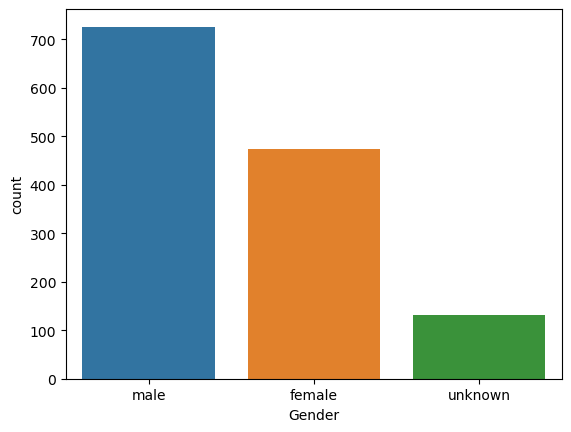

In [11]:
sns.countplot(data=demo_subset, x="Gender", order=['male', 'female', 'unknown'])
plt.show()

Text(0.5, 0, 'Birth Year')

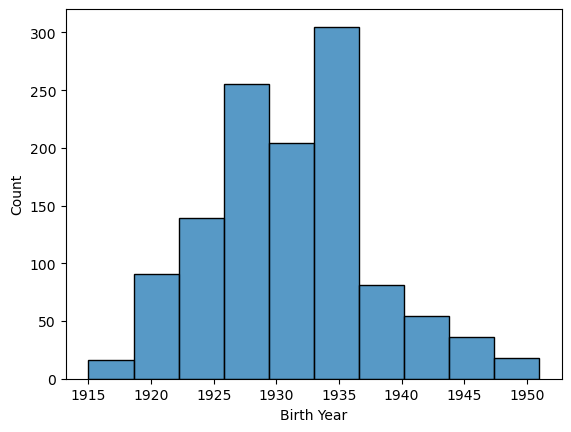

In [12]:
sns.histplot(data=demo_subset.reset_index(), x="PTDOBYY", bins=10)
plt.xlabel('Birth Year')

<AxesSubplot: xlabel='Age', ylabel='Count'>

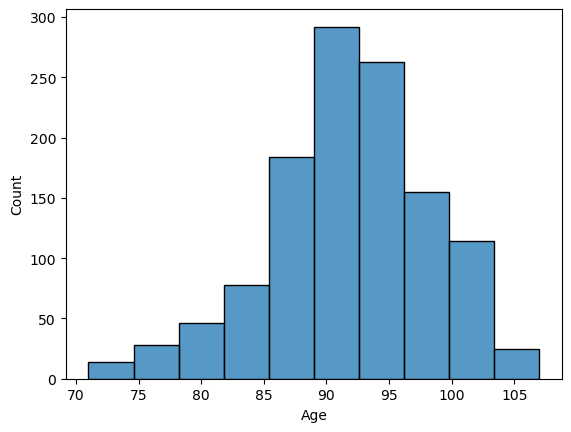

In [13]:
sns.histplot(data=demo_subset.reset_index(), x="Age", bins=10)

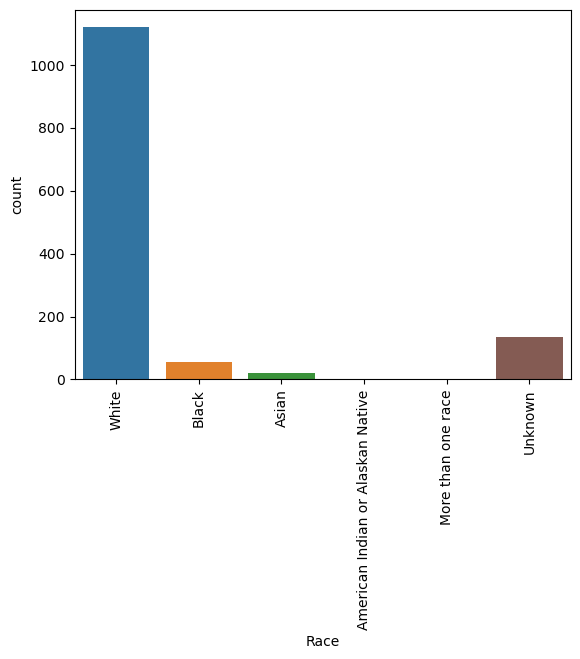

In [14]:
sns.countplot(data=demo_subset, x="Race", order=['White', 'Black', 'Asian', 'American Indian or Alaskan Native', 'More than one race', 'Unknown'])
plt.xticks(rotation = 90)
plt.show()

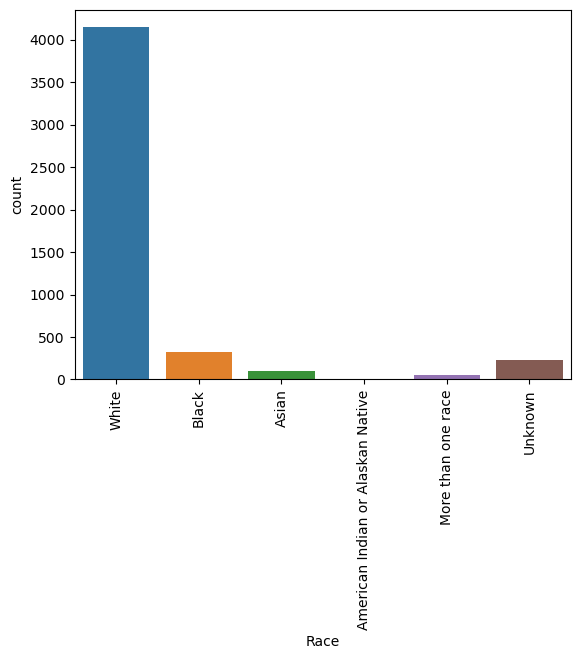

In [15]:
sns.countplot(data=demo, x="Race", order=['White', 'Black', 'Asian', 'American Indian or Alaskan Native', 'More than one race', 'Unknown'])
plt.xticks(rotation = 90)
plt.show()

In [16]:
len(demo[demo['Race'] == 'White'])/len(demo)

0.8535831960461285

In [17]:
demo.columns

Index(['Age', 'Gender', 'ID', 'Marriage_Status', 'PTADBEG', 'PTADDX',
       'PTCOGBEG', 'PTDOB', 'PTDOBYY', 'PTEDUCAT', 'PTETHCAT', 'PTGENDER',
       'PTHAND', 'PTHOME', 'PTID', 'PTMARRY', 'PTMCIBEG', 'PTNOTRT',
       'PTOTHOME', 'PTPLANG', 'PTPSPEC', 'PTRACCAT', 'PTRTYR', 'PTRTYR_DRVD',
       'PTSOURCE', 'PTTLANG', 'PTWORK', 'PTWORKHS', 'PTWRECNT', 'Phase', 'RID',
       'Race', 'SITEID', 'USERDATE', 'USERDATE2', 'VISCODE', 'VISCODE2',
       'VISDATE', 'update_stamp'],
      dtype='object')

In [18]:
hosp_subset.columns

Index(['PTID', 'Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2',
       'VISDATE', 'USERDATE', 'USERDATE2', 'RECNO', 'EXAMDATE', 'AENUMBER',
       'AEHEVNT', 'AEHBLSYM', 'AEHONSDT', 'AEHONSHR', 'AEHONGNG', 'AEHCSDT',
       'AEHCSHR', 'AEHCHRON', 'AEHSEVR', 'AEHSERIO', 'AEHSAE', 'AEHREPBY',
       'AEHREASN', 'AEHLIFE', 'AEHIMG', 'AEHLUMB', 'AEHAV45', 'AEHCMEDS',
       'AEHINHOS', 'AEHPRO', 'AEHHOSP', 'AEHOUTDT', 'AEHADMDT', 'AEHADDIA',
       'AEHDISDT', 'AEHDISDI', 'AEHDEATH', 'AEHDTHDT', 'AEHDCAUS', 'AEHALZHI',
       'AEHCOMM', 'update_stamp'],
      dtype='object')

In [19]:
demo_hosp = demo_subset.merge(hosp_subset, on='RID')

In [20]:
demo_hosp.head()

,PTID_x,Age,Gender,ID_x,Marriage_Status,PTADBEG,PTADDX,PTCOGBEG,PTDOB,PTDOBYY,...,AEHADMDT,AEHADDIA,AEHDISDT,AEHDISDI,AEHDEATH,AEHDTHDT,AEHDCAUS,AEHALZHI,AEHCOMM,update_stamp_y
0,010_S_0067,92.0,male,146,married,-4.0,NaN,NaN,05/1931,1931.0,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2006-01-18 00:00:00.0
1,010_S_0067,92.0,male,146,married,-4.0,NaN,NaN,05/1931,1931.0,...,-4,-4,-4,-4,0.0,-4,-4,-4.0,Subjects reports intermittent weakness in the ...,2006-08-15 00:00:00.0
2,010_S_0067,92.0,male,146,married,-4.0,NaN,NaN,05/1931,1931.0,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2007-01-24 00:00:00.0
3,010_S_0067,92.0,male,146,married,-4.0,NaN,NaN,05/1931,1931.0,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2007-07-24 00:00:00.0
4,010_S_0067,92.0,male,146,married,-4.0,NaN,NaN,05/1931,1931.0,...,-4,-4,-4,-4,0.0,-4,-4,-4.0,Leukemia worsened from pre-leukemia (reported ...,2009-11-16 00:00:00.0


<AxesSubplot: xlabel='Age', ylabel='Count'>

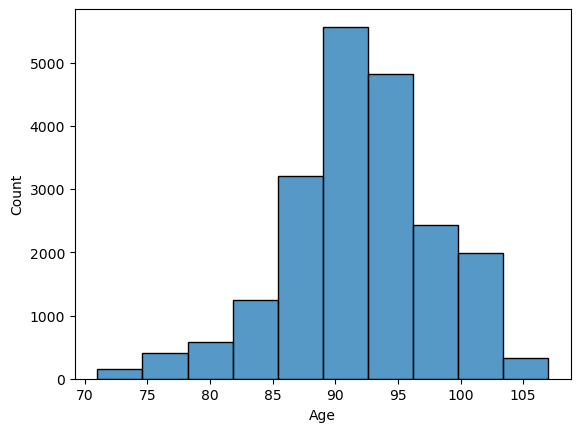

In [21]:
sns.histplot(data=demo_hosp[demo_hosp['AEHDTHDT'] == '-4'], x="Age", bins=10)

In [22]:
demo_hosp.groupby('AEHEVNT')['RID'].count().to_frame().sort_values('RID', ascending=False)[1:11]

,RID
AEHEVNT,
Fall,390
fall,384
low energy,254
Drowsiness,185
depressed mood,185
diarrhea,160
urinary frequency,149
dizziness,144
Constipation,143


In [23]:
meds.columns

Index(['Phase', 'ID', 'PTID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2',
       'VISDATE', 'USERDATE', 'USERDATE2', 'RECNO', 'EXAMDATE', 'CMMEDID',
       'CMMED', 'CMHFS', 'CMMEDO', 'CMDOSE', 'CMUNITSID', 'CMUNITS', 'CMUNITO',
       'CMFREQID', 'CMFREQNC', 'CMFREQNCO', 'CMROUTEID', 'CMROUTE', 'CMROUTEO',
       'CMREASON', 'CMEVNUM', 'CMBGN', 'CMBGNYR_DRVD', 'CMCONT', 'CMEND',
       'CMENDYR_DRVD', 'CMCOMM', 'update_stamp'],
      dtype='object')

In [24]:
meds['CMMED'].value_counts()[1:6].to_frame()

,CMMED
Aspirin,1427
Aricept,852
Namenda,581
Lisinopril,548
Simvastatin,542


In [25]:
merge.columns.to_list()

['RID',
 'COLPROT',
 'ORIGPROT',
 'PTID',
 'SITE',
 'VISCODE',
 'EXAMDATE',
 'DX_bl',
 'AGE',
 'PTGENDER',
 'PTEDUCAT',
 'PTETHCAT',
 'PTRACCAT',
 'PTMARRY',
 'APOE4',
 'FDG',
 'PIB',
 'AV45',
 'FBB',
 'ABETA',
 'TAU',
 'PTAU',
 'CDRSB',
 'ADAS11',
 'ADAS13',
 'ADASQ4',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'LDELTOTAL',
 'DIGITSCOR',
 'TRABSCOR',
 'FAQ',
 'MOCA',
 'EcogPtMem',
 'EcogPtLang',
 'EcogPtVisspat',
 'EcogPtPlan',
 'EcogPtOrgan',
 'EcogPtDivatt',
 'EcogPtTotal',
 'EcogSPMem',
 'EcogSPLang',
 'EcogSPVisspat',
 'EcogSPPlan',
 'EcogSPOrgan',
 'EcogSPDivatt',
 'EcogSPTotal',
 'FLDSTRENG',
 'FSVERSION',
 'IMAGEUID',
 'Ventricles',
 'Hippocampus',
 'WholeBrain',
 'Entorhinal',
 'Fusiform',
 'MidTemp',
 'ICV',
 'DX',
 'mPACCdigit',
 'mPACCtrailsB',
 'EXAMDATE_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'MMSE_bl',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',

In [26]:
diag_subset.head()

,PTID,Phase,ID,RID,SITEID,VISCODE,VISCODE2,VISDATE,USERDATE,USERDATE2,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
0,010_S_0067,ADNI1,92,67,106,bl,bl,2006-01-18,2006-01-18,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-01-18 00:00:00.0
1,010_S_0067,ADNI1,830,67,106,m06,m06,2006-08-14,2006-08-15,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-08-15 00:00:00.0
2,010_S_0067,ADNI1,1894,67,106,m12,m12,2007-01-23,2007-01-24,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2007-01-24 00:00:00.0
3,010_S_0067,ADNI1,4610,67,106,m24,m24,2008-01-22,2008-02-04,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2008-02-04 00:00:00.0
4,007_S_0293,ADNI1,248,293,2,bl,bl,2006-03-28,2006-03-28,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2006-03-28 00:00:00.0


In [27]:
diag_subset['DIAGNOSIS'].value_counts()

1.0    82
2.0    55
3.0    28
Name: DIAGNOSIS, dtype: int64

In [28]:
diag['VISDATE'] = pd.to_datetime(diag['VISDATE'])

In [29]:
AD_dates = {}

for patient_id in set(diag['PTID']):
    if max(diag[diag['PTID'] == patient_id]['DXAD']) != 1.0:
        AD_dates[patient_id] = float('nan')
    else:
        AD_dates[patient_id] = min(diag[(diag['PTID'] == patient_id) & (diag['DXAD'] == 1.0)]['VISDATE'])

AD_dates_df = pd.DataFrame.from_dict(AD_dates, orient='index').reset_index()
AD_dates_df.columns = ['PTID','AD_diagnosis_date']
AD_dates_df

,PTID,AD_diagnosis_date
0,123_S_6891,NaT
1,021_S_0178,NaT
2,002_S_6040,NaT
3,100_S_5280,NaT
4,067_S_7059,NaT
...,...,...
2953,073_S_4795,NaT
2954,016_S_5057,NaT
2955,127_S_2213,NaT
2956,116_S_4092,NaT


In [30]:
hosp.head()

,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,VISDATE,USERDATE,USERDATE2,...,AEHADMDT,AEHADDIA,AEHDISDT,AEHDISDI,AEHDEATH,AEHDTHDT,AEHDCAUS,AEHALZHI,AEHCOMM,update_stamp
0,ADNI1,6,2,011_S_0002,107,bl,bl,2005-09-08,2005-09-12,NaN,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2005-09-12 00:00:00.0
1,ADNI1,8,3,011_S_0003,107,bl,bl,2005-09-12,2005-09-14,NaN,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2005-09-14 00:00:00.0
2,ADNI1,10,5,011_S_0005,107,bl,bl,2005-09-07,2005-09-14,NaN,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2005-09-14 00:00:00.0
3,ADNI1,12,8,011_S_0008,107,bl,bl,2005-09-19,2005-09-27,NaN,...,-4,-4,-4,-4,-4.0,-4,-4,-4.0,-4,2005-09-27 00:00:00.0
4,ADNI1,14,30,023_S_0030,11,sc,sc,2005-10-06,2005-10-07,NaN,...,10/5/2005,obstructed large bowel,10/6/2005,obstructed large bowel,0.0,-4,-4,-4.0,"Subject reported having a ""blockage in her col...",2005-10-07 00:00:00.0


In [31]:
hosp['AEHDTHDT'] = pd.to_datetime(hosp['AEHDTHDT'], errors='coerce')
hosp['AEHDTHDT'].value_counts()

2012-02-29    2
2007-12-26    2
2014-06-17    2
2013-01-01    2
2009-06-03    2
             ..
2012-09-02    1
2012-10-20    1
2012-04-08    1
2011-11-13    1
2016-04-13    1
Name: AEHDTHDT, Length: 131, dtype: int64

In [32]:
death_dates = {}

for patient_id in set(hosp['PTID']):
    if len(hosp[(hosp['PTID'] == patient_id) & (~hosp['AEHDTHDT'].isnull())]['AEHDTHDT']) < 1:
        death_dates[patient_id] = float('nan')
    else:
        death_dates[patient_id] = min(hosp[(hosp['PTID'] == patient_id) & (~hosp['AEHDTHDT'].isnull())]['AEHDTHDT'])

death_dates_df = pd.DataFrame.from_dict(death_dates, orient='index').reset_index()
death_dates_df.columns = ['PTID','death_date']
death_dates_df

,PTID,death_date
0,021_S_0178,NaT
1,100_S_5280,NaT
2,014_S_0520,NaT
3,002_S_2073,NaT
4,136_S_0086,NaT
...,...,...
1791,073_S_4795,NaT
1792,016_S_5057,NaT
1793,127_S_2213,NaT
1794,116_S_4092,2017-12-24


In [33]:
death_dates_df['death_date'].value_counts()

2018-03-10    2
2014-06-17    2
2013-01-01    2
2014-05-11    1
2014-09-21    1
             ..
2010-12-16    1
2014-01-21    1
2014-12-26    1
2009-10-01    1
2016-10-21    1
Name: death_date, Length: 131, dtype: int64

In [34]:
df_labels = AD_dates_df.merge(death_dates_df, on='PTID')
df_labels

,PTID,AD_diagnosis_date,death_date
0,021_S_0178,NaT,NaT
1,100_S_5280,NaT,NaT
2,014_S_0520,NaT,NaT
3,002_S_2073,NaT,NaT
4,136_S_0086,NaT,NaT
...,...,...,...
1762,073_S_4795,NaT,NaT
1763,016_S_5057,NaT,NaT
1764,127_S_2213,NaT,NaT
1765,116_S_4092,NaT,2017-12-24


In [35]:
df_labels.to_csv('../data/AD_diagnosis_and_death_dates.csv', index=False)

In [36]:
final = challenge.merge(df_labels, left_on='Subject', right_on='PTID')
final.head(20)

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,...,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission,PTID,AD_diagnosis_date,death_date
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/05,AD,2005-09-12,81.3,...,Not Hisp/Latino,White,1,20,True,"3,4",AD,011_S_0003,2005-09-30,NaT
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,2005-11-08,67.5,...,Hisp/Latino,White,0,27,False,"3,3",MCI,022_S_0004,NaT,NaT
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/05,CN,2005-09-07,73.7,...,Not Hisp/Latino,White,0,29,True,"3,3",CN,011_S_0005,NaT,NaT
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,2005-11-29,80.4,...,Not Hisp/Latino,White,0,25,True,"3,3",MCI,100_S_0006,NaT,NaT
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11/7/05,AD,2005-11-10,73.9,...,Not Hisp/Latino,White,1,24,True,"3,4",AD,011_S_0010,2005-11-10,NaT
5,1b4f75db908c740500a9f46c409b8a30,022_S_0014,14,59375,MRI,1,9/29/05,CN,2005-11-04,78.5,...,Hisp/Latino,White,0,29,False,"3,3",CN,022_S_0014,NaT,NaT
6,d48c4a953904db90b35da1a4c06ea373,100_S_0015,15,33066,MRI,1,9/26/05,CN,2005-10-18,80.8,...,Not Hisp/Latino,White,1,29,True,"3,4",CN,100_S_0015,NaT,2013-04-22
7,ff816ae1926d624a1f8de68024959515,011_S_0016,16,32306,MRI,1,9/27/05,CN,2005-10-13,65.4,...,Not Hisp/Latino,Black,1,28,False,"3,4",CN,011_S_0016,NaT,NaT
8,089510f9cdcea610b6f294d3b42a9035,067_S_0019,19,45228,MRI,1,10/12/05,CN,2005-11-23,73.1,...,Not Hisp/Latino,White,0,29,True,"2,3",CN,067_S_0019,NaT,NaT
9,457d28b028ab703eb2cabb3923f6e232,011_S_0021,21,32332,MRI,1,10/10/05,CN,2005-10-24,72.6,...,Not Hisp/Latino,Black,0,30,False,"2,3",CN,011_S_0021,NaT,NaT


In [37]:
final.dtypes

directory.id                       object
Subject                            object
RID                                 int64
Image.Data.ID                       int64
Modality                           object
Visit                               int64
Acq.Date                           object
DX.bl                              object
EXAMDATE                   datetime64[ns]
AGE                               float64
PTGENDER                           object
PTEDUCAT                            int64
PTETHCAT                           object
PTRACCAT                           object
APOE4                               int64
MMSE                                int64
imputed_genotype                   object
APOE Genotype                      object
Dx Codes for Submission            object
PTID                               object
AD_diagnosis_date          datetime64[ns]
death_date                 datetime64[ns]
dtype: object

In [38]:
final['Acq.Date'] = pd.to_datetime(final['Acq.Date'])
final['EXAMDATE'] = pd.to_datetime(final['EXAMDATE'])
final.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,...,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission,PTID,AD_diagnosis_date,death_date
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,2005-09-01,AD,2005-09-12,81.3,...,Not Hisp/Latino,White,1,20,True,"3,4",AD,011_S_0003,2005-09-30,NaT
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,2005-09-22,LMCI,2005-11-08,67.5,...,Hisp/Latino,White,0,27,False,"3,3",MCI,022_S_0004,NaT,NaT
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,2005-09-02,CN,2005-09-07,73.7,...,Not Hisp/Latino,White,0,29,True,"3,3",CN,011_S_0005,NaT,NaT
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,2005-11-15,LMCI,2005-11-29,80.4,...,Not Hisp/Latino,White,0,25,True,"3,3",MCI,100_S_0006,NaT,NaT
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,2005-11-07,AD,2005-11-10,73.9,...,Not Hisp/Latino,White,1,24,True,"3,4",AD,011_S_0010,2005-11-10,NaT


In [39]:
final['time_to_dx'] = final['AD_diagnosis_date'] - final['Acq.Date']
final.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,...,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission,PTID,AD_diagnosis_date,death_date,time_to_dx
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,2005-09-01,AD,2005-09-12,81.3,...,White,1,20,True,"3,4",AD,011_S_0003,2005-09-30,NaT,29 days
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,2005-09-22,LMCI,2005-11-08,67.5,...,White,0,27,False,"3,3",MCI,022_S_0004,NaT,NaT,NaT
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,2005-09-02,CN,2005-09-07,73.7,...,White,0,29,True,"3,3",CN,011_S_0005,NaT,NaT,NaT
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,2005-11-15,LMCI,2005-11-29,80.4,...,White,0,25,True,"3,3",MCI,100_S_0006,NaT,NaT,NaT
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,2005-11-07,AD,2005-11-10,73.9,...,White,1,24,True,"3,4",AD,011_S_0010,2005-11-10,NaT,3 days


In [40]:
final['time_to_AD_dx_days'] = final['time_to_dx'].dt.days
final.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,...,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission,PTID,AD_diagnosis_date,death_date,time_to_dx,time_to_AD_dx_days
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,2005-09-01,AD,2005-09-12,81.3,...,1,20,True,"3,4",AD,011_S_0003,2005-09-30,NaT,29 days,29.0
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,2005-09-22,LMCI,2005-11-08,67.5,...,0,27,False,"3,3",MCI,022_S_0004,NaT,NaT,NaT,NaN
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,2005-09-02,CN,2005-09-07,73.7,...,0,29,True,"3,3",CN,011_S_0005,NaT,NaT,NaT,NaN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,2005-11-15,LMCI,2005-11-29,80.4,...,0,25,True,"3,3",MCI,100_S_0006,NaT,NaT,NaT,NaN
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,2005-11-07,AD,2005-11-10,73.9,...,1,24,True,"3,4",AD,011_S_0010,2005-11-10,NaT,3 days,3.0


In [41]:
final = final[final['DX.bl'] != 'AD']
len(final)

495

In [42]:
max(final['time_to_AD_dx_days'].dropna())/365

4.443835616438356

In [43]:
5*365

1825

In [44]:
final['AD_dx_in_5_yrs'] = (~final['time_to_AD_dx_days'].isnull()) & (final['time_to_AD_dx_days'] <= 1825)
final['AD_dx_in_5_yrs'] = final['AD_dx_in_5_yrs'].astype(int)
final.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,...,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission,PTID,AD_diagnosis_date,death_date,time_to_dx,time_to_AD_dx_days,AD_dx_in_5_yrs
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,2005-09-22,LMCI,2005-11-08,67.5,...,27,False,"3,3",MCI,022_S_0004,NaT,NaT,NaT,NaN,0
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,2005-09-02,CN,2005-09-07,73.7,...,29,True,"3,3",CN,011_S_0005,NaT,NaT,NaT,NaN,0
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,2005-11-15,LMCI,2005-11-29,80.4,...,25,True,"3,3",MCI,100_S_0006,NaT,NaT,NaT,NaN,0
5,1b4f75db908c740500a9f46c409b8a30,022_S_0014,14,59375,MRI,1,2005-09-29,CN,2005-11-04,78.5,...,29,False,"3,3",CN,022_S_0014,NaT,NaT,NaT,NaN,0
6,d48c4a953904db90b35da1a4c06ea373,100_S_0015,15,33066,MRI,1,2005-09-26,CN,2005-10-18,80.8,...,29,True,"3,4",CN,100_S_0015,NaT,2013-04-22,NaT,NaN,0


In [45]:
final['AD_dx_in_5_yrs'].value_counts()

0    345
1    150
Name: AD_dx_in_5_yrs, dtype: int64

In [46]:
df_outcomes = final[['PTID', 'Image.Data.ID', 'Acq.Date', 'time_to_AD_dx_days', 'AD_dx_in_5_yrs']]
df_outcomes.head()

,PTID,Image.Data.ID,Acq.Date,time_to_AD_dx_days,AD_dx_in_5_yrs
1,022_S_0004,64631,2005-09-22,NaN,0
2,011_S_0005,32246,2005-09-02,NaN,0
3,100_S_0006,33025,2005-11-15,NaN,0
5,022_S_0014,59375,2005-09-29,NaN,0
6,100_S_0015,33066,2005-09-26,NaN,0


In [47]:
df_outcomes.to_csv('../data/AD_time_to_dx.csv', index=False)

In [48]:
final.columns

Index(['directory.id', 'Subject', 'RID', 'Image.Data.ID', 'Modality', 'Visit',
       'Acq.Date', 'DX.bl', 'EXAMDATE', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'PTETHCAT', 'PTRACCAT', 'APOE4', 'MMSE', 'imputed_genotype',
       'APOE Genotype', 'Dx Codes for Submission', 'PTID', 'AD_diagnosis_date',
       'death_date', 'time_to_dx', 'time_to_AD_dx_days', 'AD_dx_in_5_yrs'],
      dtype='object')

In [49]:
data = final[['DX.bl', 'AGE', 'PTGENDER', 'PTEDUCAT','PTETHCAT', 'PTRACCAT', 'APOE4', 'MMSE', 'AD_dx_in_5_yrs']]
data.to_csv('../data/clinical_training_data.csv', index=False)

In [50]:
print(len(final.merge(medhist, on='RID').groupby('RID')))
print(len(final))

495
495


In [16]:
medhist['EXAMDATE'] = pd.to_datetime(medhist['EXAMDATE'])
medhist.head()

,Phase,ID,PTID,RID,SITEID,VISCODE,VISCODE2,VISDATE,USERDATE,USERDATE2,...,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR,MHCOMMEN,update_stamp
0,ADNI1,8,011_S_0002,2,107,sc,sc,2005-08-17,2005-08-17,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,-4,2005-08-17 00:00:00.0
1,ADNI1,10,022_S_0001,1,10,f,f,2005-08-18,2005-08-18,NaN,...,NaN,0,NaN,NaN,NaN,0,0,1,-4,2005-08-18 00:00:00.0
2,ADNI1,12,011_S_0003,3,107,sc,sc,2005-08-18,2005-08-18,NaN,...,NaN,1,NaN,NaN,NaN,1,1,0,-4,2005-08-18 00:00:00.0
3,ADNI1,14,022_S_0004,4,10,sc,sc,2005-08-18,2005-08-18,NaN,...,NaN,1,NaN,NaN,NaN,0,1,0,-4,2005-08-18 00:00:00.0
4,ADNI1,16,011_S_0005,5,107,sc,sc,2005-08-23,2005-08-23,NaN,...,NaN,1,NaN,NaN,NaN,0,1,0,-4,2005-08-23 00:00:00.0


In [7]:
medhist.columns.to_list()

['Phase',
 'ID',
 'PTID',
 'RID',
 'SITEID',
 'VISCODE',
 'VISCODE2',
 'VISDATE',
 'USERDATE',
 'USERDATE2',
 'EXAMDATE',
 'MHSOURCE',
 'MHPSYCH',
 'MH2NEURL',
 'MH3HEAD',
 'MH4CARD',
 'MH5RESP',
 'MH6HEPAT',
 'MH7DERM',
 'MH8MUSCL',
 'MH9ENDO',
 'MH10GAST',
 'MH11HEMA',
 'MH12RENA',
 'MH13ALLE',
 'MH14ALCH',
 'MH14AALCH',
 'MH14BALCH',
 'MH14CALCH',
 'MH15DRUG',
 'MH15ADRUG',
 'MH15BDRUG',
 'MH16SMOK',
 'MH16ASMOK',
 'MH16BSMOK',
 'MH16CSMOK',
 'MH17MALI',
 'MH18SURG',
 'MH19OTHR',
 'MHCOMMEN',
 'update_stamp']

In [74]:
import json
ch_medhist = final.merge(medhist, on=['RID'])
ch_medhist = ch_medhist[ch_medhist['EXAMDATE_y'] <= ch_medhist['EXAMDATE_x']]
json.dumps(ch_medhist.columns.to_list())

'["directory.id", "Subject", "RID", "Image.Data.ID", "Modality", "Visit", "Acq.Date", "DX.bl", "EXAMDATE_x", "AGE", "PTGENDER", "PTEDUCAT", "PTETHCAT", "PTRACCAT", "APOE4", "MMSE", "imputed_genotype", "APOE Genotype", "Dx Codes for Submission", "PTID_x", "AD_diagnosis_date", "death_date", "time_to_dx", "time_to_AD_dx_days", "AD_dx_in_5_yrs", "Phase", "ID", "PTID_y", "SITEID", "VISCODE", "VISCODE2", "VISDATE", "USERDATE", "USERDATE2", "EXAMDATE_y", "MHSOURCE", "MHPSYCH", "MH2NEURL", "MH3HEAD", "MH4CARD", "MH5RESP", "MH6HEPAT", "MH7DERM", "MH8MUSCL", "MH9ENDO", "MH10GAST", "MH11HEMA", "MH12RENA", "MH13ALLE", "MH14ALCH", "MH14AALCH", "MH14BALCH", "MH14CALCH", "MH15DRUG", "MH15ADRUG", "MH15BDRUG", "MH16SMOK", "MH16ASMOK", "MH16BSMOK", "MH16CSMOK", "MH17MALI", "MH18SURG", "MH19OTHR", "MHCOMMEN", "update_stamp"]'

In [75]:
ch_medhist = ch_medhist[["DX.bl", "AGE", "PTGENDER", "PTEDUCAT", "PTETHCAT", "PTRACCAT", "APOE4", "MMSE", "MHPSYCH", "MH2NEURL", "MH3HEAD", "MH4CARD", "MH5RESP", "MH6HEPAT", "MH7DERM", "MH8MUSCL", "MH9ENDO", "MH10GAST", "MH11HEMA", "MH12RENA", "MH13ALLE", "MH14ALCH", "MH15DRUG", "MH16SMOK", "MH17MALI", "MH18SURG", "AD_dx_in_5_yrs"]]

In [76]:
ch_medhist.columns.to_list()

['DX.bl',
 'AGE',
 'PTGENDER',
 'PTEDUCAT',
 'PTETHCAT',
 'PTRACCAT',
 'APOE4',
 'MMSE',
 'MHPSYCH',
 'MH2NEURL',
 'MH3HEAD',
 'MH4CARD',
 'MH5RESP',
 'MH6HEPAT',
 'MH7DERM',
 'MH8MUSCL',
 'MH9ENDO',
 'MH10GAST',
 'MH11HEMA',
 'MH12RENA',
 'MH13ALLE',
 'MH14ALCH',
 'MH15DRUG',
 'MH16SMOK',
 'MH17MALI',
 'MH18SURG',
 'AD_dx_in_5_yrs']

In [79]:
ch_medhist.columns = ['Diagnosis_at_Baseline',
                     'Age',
                     'Gender',
                     'Years_of_Education',
                     'Ethnicity',
                     'Race',
                     'APOE4',
                     'MMSE',
                     'Medical_History_of_Psychiatric_Issues',
                     'Medical_History_of_Neurological_Issues',
                     'Medical_History_of_Head_Eyes_Ears_Nose_and_Throat_Issues',
                     'Medical_History_of_Cardiovascular_Issues',
                     'Medical_History_of_Respiratory_Issues',
                     'Medical_History_of_Hepatic_Issues',
                     'Medical_History_of_Dermatologic_Connective_Tissue_Issues',
                     'Medical_History_of_Musculoskeletal_Issues',
                     'Medical_History_of_Endocrine_Metabolic_Issues',
                     'Medical_History_of_Gastrointestinal_Issues',
                     'Medical_History_of_Hematopoietic_Lymphatic_Issues',
                     'Medical_History_of_Renal_Genitourinary_Issues',
                     'Medical_History_of_Allergies_Drug_Sensitivities',
                     'Medical_History_of_Alcohol_Abuse',
                     'Medical_History_of_Drug_Abuse',
                     'Medical_History_of_Smoking',
                     'Medical_History_of_Malignancy',
                     'Medical_History_of_Surgery',
                     'AD_dx_in_5_yrs']

ch_medhist.head()

,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,Medical_History_of_Psychiatric_Issues,Medical_History_of_Neurological_Issues,...,Medical_History_of_Gastrointestinal_Issues,Medical_History_of_Hematopoietic_Lymphatic_Issues,Medical_History_of_Renal_Genitourinary_Issues,Medical_History_of_Allergies_Drug_Sensitivities,Medical_History_of_Alcohol_Abuse,Medical_History_of_Drug_Abuse,Medical_History_of_Smoking,Medical_History_of_Malignancy,Medical_History_of_Surgery,AD_dx_in_5_yrs
0,LMCI,67.5,Male,10,Hisp/Latino,White,0,27,0,0,...,0,0,1,0,0,0,1,0,1,0
1,CN,73.7,Male,16,Not Hisp/Latino,White,0,29,0,0,...,1,0,1,0,0,0,1,0,1,0
2,LMCI,80.4,Female,13,Not Hisp/Latino,White,0,25,0,0,...,1,0,0,1,0,0,0,0,1,0
3,CN,78.5,Female,12,Hisp/Latino,White,0,29,1,0,...,0,0,0,0,0,0,0,0,1,0
4,CN,80.8,Male,18,Not Hisp/Latino,White,1,29,0,0,...,1,0,1,1,0,0,0,1,1,0


In [80]:
ch_medhist.to_csv('../data/clinical_training_data_with_medhist.csv', index=False)